In [1]:
# File Handling
import os
import pickle

# Plot Handling
import matplotlib.pyplot as plt

# data handling
import numpy as np
import pandas as pd

# Make Plotting interactive
from ipywidgets import interact, fixed

# Wrapper for xraylarch (larch)
os.chdir('..')
pwd = os.getcwd()
os.chdir('./catxas')
import general as fcts
import xas as xfcts
import plot as pfcts
import process
import experiment as exp

%matplotlib inline

In [43]:
norm_xanes_file = r'C:\Users\ashoff\OneDrive - SLAC National Accelerator Laboratory\Python Codes\GitHub\catxas\sample results\SnO2_TPR_NormXANES.csv'

process_file = r'C:\Users\ashoff\OneDrive - SLAC National Accelerator Laboratory\Python Codes\GitHub\catxas\sample results\SnO2_TPR_Process_Correlation.csv'

In [24]:
df = pd.read_csv(norm_xanes_file, index_col=0)

In [25]:
df

,2021-06-14 16:33:52,2021-06-14 16:35:37,2021-06-14 16:37:23,2021-06-14 16:39:11,2021-06-14 16:40:57,2021-06-14 16:42:42,2021-06-14 16:44:27,2021-06-14 16:46:13,2021-06-14 16:47:59,2021-06-14 16:49:44,...,2021-06-14 17:44:29,2021-06-14 17:46:15,2021-06-14 17:48:01,2021-06-14 17:49:47,2021-06-14 17:51:32,2021-06-14 17:53:18,2021-06-14 17:55:04,2021-06-14 17:56:50,2021-06-14 17:58:36,2021-06-14 18:00:22
energy,,,,,,,,,,,,,,,,,,,,,
29050.00,0.002619,0.002295,0.003158,0.003715,0.001510,0.002026,0.003441,0.002698,0.001477,0.002068,...,0.002399,0.003267,0.003882,0.001127,0.002596,0.003232,0.001984,0.002726,0.002633,0.002933
29050.25,0.002365,0.004379,0.003481,0.004571,0.001989,0.002780,0.001920,0.002248,0.001953,0.002905,...,0.001985,0.003575,0.003684,0.001576,0.003416,0.003675,0.002172,0.003516,0.003499,0.003048
29050.50,0.003070,0.003868,0.003115,0.002540,0.002181,0.003320,0.001473,0.003113,0.001883,0.003675,...,0.002306,0.003444,0.003011,0.002790,0.003823,0.002983,0.002100,0.001737,0.003759,0.002388
29050.75,0.002792,0.003402,0.002408,0.001921,0.001749,0.003390,0.002508,0.004110,0.001833,0.003160,...,0.002950,0.004907,0.001759,0.001635,0.001587,0.001822,0.001676,0.002867,0.002822,0.002461
29051.00,0.001904,0.002485,0.002534,0.003442,0.001204,0.003683,0.002459,0.002901,0.002432,0.001808,...,0.004029,0.003128,0.002517,0.003239,0.001602,0.002493,0.002650,0.002732,0.001581,0.003206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29449.00,1.014350,1.010190,1.014533,1.014234,1.011143,1.011355,1.013463,1.012311,1.012425,1.012354,...,1.003319,1.004101,1.002212,1.002634,1.003507,1.004044,1.004602,1.002887,1.005414,1.002232
29449.25,1.012178,1.012520,1.012625,1.013208,1.012698,1.011943,1.012722,1.014264,1.012112,1.012313,...,1.003575,1.004478,1.003165,1.002115,1.002953,1.004137,1.006547,1.003115,1.003804,1.004439
29449.50,1.013929,1.013577,1.011191,1.010323,1.011830,1.013170,1.013288,1.013399,1.012179,1.012063,...,1.003186,1.005463,1.002781,1.004481,1.003133,1.005171,1.005861,1.003807,1.001968,1.003669


In [46]:
process_df = pd.read_csv(process_file, index_col=0)

In [47]:
process_df

,File Name,TOS [s],H2,He,H2O,28,O2,Ar,CO2,T,...,Extra TC3 - Extra TC3 [°C],Extra TC4 - Extra TC4 [°C],Extra TC5 - Extra TC5 [°C],Extra TC6 - Extra TC6 [°C],Extra TC7 - Extra TC7 [°C],Extra TC8 - Extra TC8 [°C],Extra DO 1,Extra DO 2,Extra DO 3,Extra DO 4
Time,,,,,,,,,,,,,,,,,,,,,
2021-06-14 16:33:52,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0001,0.0,4.929417e-10,1.810452e-07,6.951219e-09,8.664734e-09,2.471646e-09,0.000004,7.719114e-11,26.120772,...,2300.190768,2300.464815,2300.464815,2300.464815,2300.343342,2300.343342,0.0,0.0,0.0,0.0
2021-06-14 16:35:37,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0002,105.0,4.931230e-10,1.827490e-07,6.926960e-09,8.628440e-09,2.426090e-09,0.000004,7.898010e-11,25.907800,...,2300.228154,2300.499174,2300.499174,2300.499174,2300.378966,2300.378966,0.0,0.0,0.0,0.0
2021-06-14 16:37:23,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0003,211.0,4.713019e-10,1.821100e-07,6.798056e-09,8.669651e-09,2.461149e-09,0.000004,7.286727e-11,26.067593,...,2300.241883,2300.510800,2300.510800,2300.510800,2300.391108,2300.391108,0.0,0.0,0.0,0.0
2021-06-14 16:39:11,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0004,319.0,4.056493e-09,1.949101e-07,7.054554e-09,9.396570e-09,1.122279e-08,0.000004,1.175604e-10,26.068597,...,2300.262552,2300.529460,2300.529460,2300.529460,2300.409950,2300.409950,0.0,0.0,0.0,0.0
2021-06-14 16:40:57,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0005,425.0,1.128710e-08,1.397490e-08,7.368780e-09,8.759550e-09,4.797820e-09,0.000004,9.577160e-11,26.015300,...,2300.294947,2300.559966,2300.559966,2300.559966,2300.440447,2300.440447,0.0,0.0,0.0,0.0
2021-06-14 16:42:42,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0006,530.0,1.628722e-08,7.763893e-09,7.012374e-09,8.508112e-09,3.144702e-09,0.000004,1.011230e-10,25.964397,...,2300.302634,2300.566300,2300.566300,2300.566300,2300.444244,2300.444244,0.0,0.0,0.0,0.0
2021-06-14 16:44:27,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0007,635.0,1.677209e-07,6.677977e-09,6.732073e-09,8.423802e-09,2.903965e-09,0.000004,9.577366e-11,26.007782,...,2300.321962,2300.584995,2300.584995,2300.584995,2300.463512,2300.463512,0.0,0.0,0.0,0.0
2021-06-14 16:46:13,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0008,741.0,5.390002e-07,6.013107e-09,6.438386e-09,8.409555e-09,2.787266e-09,0.000004,8.044948e-11,25.961600,...,2300.348302,2300.611476,2300.611476,2300.611476,2300.491137,2300.491137,0.0,0.0,0.0,0.0
2021-06-14 16:47:59,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0009,847.0,5.453353e-07,5.441864e-09,6.127758e-09,8.365563e-09,2.705257e-09,0.000004,8.813759e-11,26.992001,...,2300.356767,2300.619987,2300.619987,2300.619987,2300.500101,2300.500101,0.0,0.0,0.0,0.0


In [26]:
difference = df.sub(df.iloc[:,0], axis = 0)

In [27]:
difference

,2021-06-14 16:33:52,2021-06-14 16:35:37,2021-06-14 16:37:23,2021-06-14 16:39:11,2021-06-14 16:40:57,2021-06-14 16:42:42,2021-06-14 16:44:27,2021-06-14 16:46:13,2021-06-14 16:47:59,2021-06-14 16:49:44,...,2021-06-14 17:44:29,2021-06-14 17:46:15,2021-06-14 17:48:01,2021-06-14 17:49:47,2021-06-14 17:51:32,2021-06-14 17:53:18,2021-06-14 17:55:04,2021-06-14 17:56:50,2021-06-14 17:58:36,2021-06-14 18:00:22
energy,,,,,,,,,,,,,,,,,,,,,
29050.00,0.0,-0.000324,0.000538,0.001096,-0.001109,-0.000593,0.000822,0.000079,-0.001142,-0.000551,...,-0.000220,0.000648,0.001262,-0.001492,-0.000023,0.000613,-0.000635,0.000107,0.000013,0.000314
29050.25,0.0,0.002014,0.001116,0.002205,-0.000376,0.000415,-0.000445,-0.000117,-0.000412,0.000540,...,-0.000380,0.001210,0.001319,-0.000789,0.001051,0.001310,-0.000193,0.001151,0.001134,0.000683
29050.50,0.0,0.000798,0.000045,-0.000530,-0.000889,0.000250,-0.001597,0.000043,-0.001187,0.000605,...,-0.000764,0.000374,-0.000059,-0.000280,0.000753,-0.000087,-0.000970,-0.001333,0.000689,-0.000682
29050.75,0.0,0.000609,-0.000384,-0.000871,-0.001043,0.000598,-0.000284,0.001318,-0.000959,0.000368,...,0.000158,0.002115,-0.001033,-0.001158,-0.001206,-0.000970,-0.001116,0.000075,0.000030,-0.000331
29051.00,0.0,0.000580,0.000629,0.001538,-0.000701,0.001778,0.000555,0.000997,0.000528,-0.000096,...,0.002124,0.001224,0.000613,0.001334,-0.000303,0.000588,0.000746,0.000828,-0.000323,0.001302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29449.00,0.0,-0.004160,0.000183,-0.000116,-0.003207,-0.002994,-0.000887,-0.002039,-0.001925,-0.001996,...,-0.011031,-0.010249,-0.012138,-0.011715,-0.010843,-0.010306,-0.009748,-0.011463,-0.008936,-0.012118
29449.25,0.0,0.000342,0.000446,0.001030,0.000519,-0.000236,0.000544,0.002086,-0.000066,0.000134,...,-0.008603,-0.007700,-0.009014,-0.010063,-0.009225,-0.008041,-0.005631,-0.009063,-0.008374,-0.007739
29449.50,0.0,-0.000352,-0.002738,-0.003606,-0.002099,-0.000759,-0.000641,-0.000530,-0.001750,-0.001866,...,-0.010743,-0.008466,-0.011148,-0.009448,-0.010795,-0.008758,-0.008068,-0.010122,-0.011961,-0.010259


(29150.0, 29300.0)

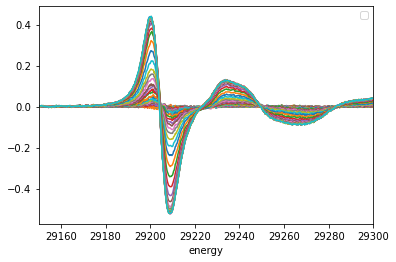

In [34]:
difference.plot()

plt.legend('')
plt.xlim(29150,29300)

In [ ]:
difference.to_csv('fname here')

<AxesSubplot:>

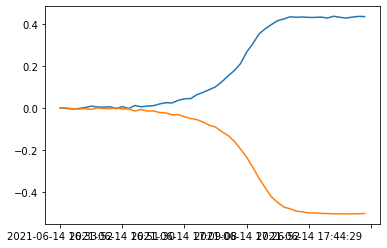

In [42]:
difference.loc[29200].plot()
difference.loc[29210].plot()

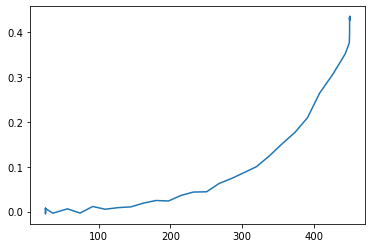

In [51]:
x = process_df['T'].values
y = difference.loc[29200]

plt.plot(x,y)